# Data Analysis in Geoscience Remote Sensing Projects: Exercises - 3
## Regression analysis and sensitivity estimation
Hendrik Andersen, contact: hendrik.andersen@kit.edu 

Let's import the fremont data again as toy data for the regression example.

C:\Users\sudur\AppData\Local\Temp\ipykernel_13612\2859292655.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)


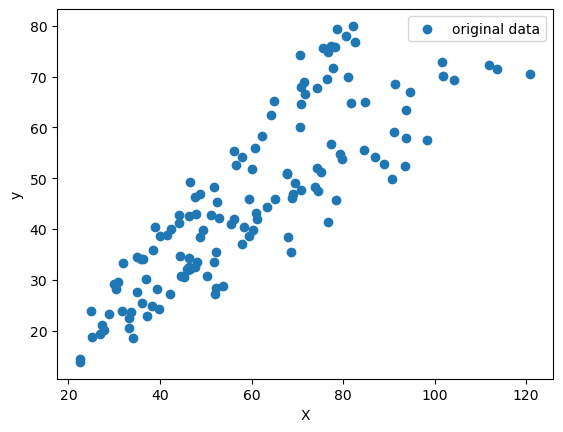

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.datasets import fetch_openml
from datetime import datetime, timedelta
from scipy.stats import pearsonr, linregress

# Read in data as pandas dataframe
df = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
df = df.rename(columns={"Fremont Bridge Sidewalks, south of N 34th St": "total", 
                        "Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk": "east",
                        "Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk": "west"}) 

X = df['east'].resample('m').mean()
y = df['west'].resample('m').mean()
z = df['total'].resample('m').mean()
plt.scatter(X, y, label='original data')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
# The module stats within the package scipy contains many useful functions
# We imported some functions from this module at the beginning of this script...
# ...and now calculate the correlation coefficient after Pearson with the function imported above
r,p = pearsonr(X,y)
# The p-value is used to estimate the significance of the calculated correlation
print("Pearson correlation coefficient : ", r,"\n Significant at the 95% level : ",p < 0.05)


Pearson correlation coefficient :  0.8444078151960359 
 Significant at the 95% level :  True


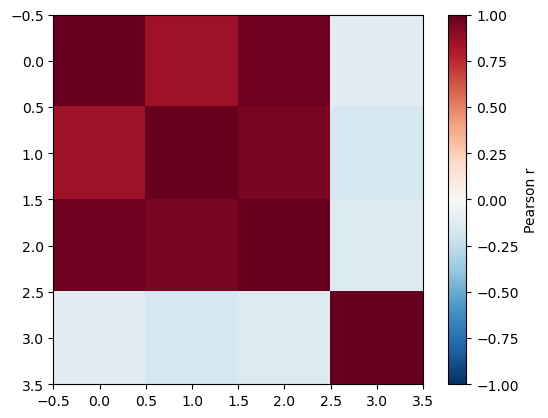

In [5]:
corr_matrix = np.corrcoef([X,y,z,np.random.rand(z.size)]) # np.corrcoef can compute correlation matrices. 
# try to understand what is being correlated in the line above. Check out the visualization as a help.
plt.imshow(corr_matrix, cmap = plt.cm.RdBu_r, vmin = -1, vmax = 1)
plt.colorbar(label = 'Pearson r'); plt.show()  # semicolon means new line

### Different packages for regression
There are different packages available that allow the computation of a simple (multiple) linear regression. The standard module is probably stats in the scipy package. This contains the function linregress().

In [7]:
# Using the linregress() function from the scipy.stats module to calculate a regression line
from scipy import stats

# the function linregress() returns the slope intercept, r_value, p_value, and std_err of a regression. 
# you can write your code like this  
slope, intercept, rvalue, pvalue, stderr = stats.linregress(X,y)
# or like this
results = stats.linregress(X,y)
# and then access e.g. the slope like so:
results.slope

0.6564505361859382

You can then plot the regression line simply by using the regression formula as the y in the plt.plot() function

$Y = \beta_0 + \beta_1 * X$

where $\beta_0$ is the intercept and $\beta_1$ the slope

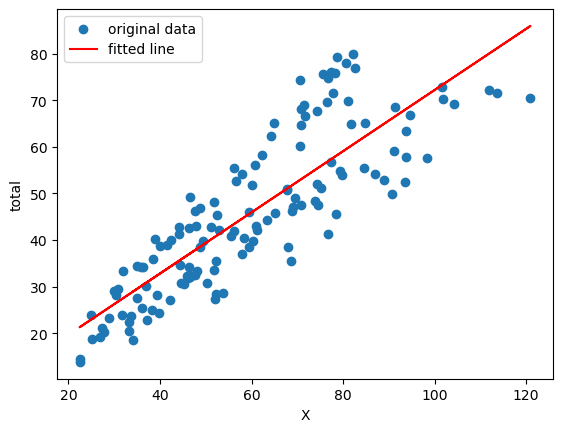

In [8]:
# Plot the resulting line above a scatterplot to visualize the result
plt.scatter(X,y, label='original data')
plt.plot(X, intercept + slope*X, 'r', label='fitted line')
plt.legend()
plt.xlabel('X')
plt.ylabel('total')
plt.legend()
plt.show()

Another useful package one can use to compute a linear regression is scikit-learn or short sklearn. Sklearn is one of the most popular machine learning packages in python. 

In [9]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

# to use the function LinearRegression() from sklearn, the X data needs to have a 2-dimensional shape
X_ = np.expand_dims(X, axis = 1)
print(X.shape, X_.shape)

(135,) (135, 1)


Sklearn is designed so that all statistical and machine learning models can be called with the same methods (e.g. .fit(), or .predict() - see the help or the sklearn website: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and will work with the same data structures. This is also the reason why the function LinearRegression() expects a 2-dimensional array, as the standard input data to machine learning models has multiple predictors and is structured as an n x p dimensional array, with n the number of observations and p the number of predictors. This comes in handy later when we just conveniently change the model used by changing only one line of code... 

C:\Users\sudur\miniconda3\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sudur\miniconda3\envs\Python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


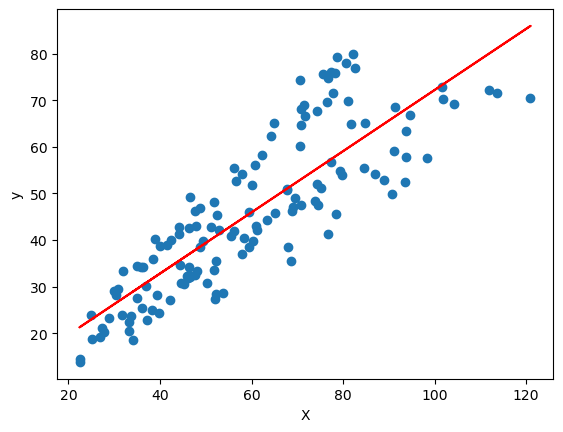

In [11]:
# fit the regression
regr.fit(X_,y)
# use the trained linear model to predict a value for each of the 116 observations in X_
y_pred = regr.predict(X_)

fig, ax = plt.subplots()
ax.scatter(X, y, label='original data')
# you can plot the regression line by using the predicted values (just plot it as a line and not as scattered points)
ax.plot(X, y_pred, color='r', label='fitted line')
ax.set_ylabel('y')
ax.set_xlabel('X')
plt.plot();

### How good is the regression model?

To estimate the quality of the fit of the regression model, we need to quantify the $\epsilon$ of the linear regression equation and derive statistics from it

$Y = \beta_0 + \beta_1 * X + \epsilon$

We can first visualize the $\epsilon$, be drawing vertical lines (vlines) from the prediction to the observation

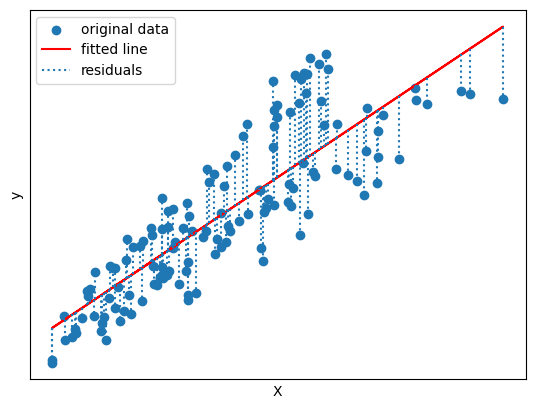

In [12]:
fig, ax = plt.subplots()
ax.scatter(X, y, label='original data')
ax.plot(X, y_pred, color='r', label='fitted line')
ax.set_ylabel('y')
ax.set_xlabel('X')
ax.vlines(X_,y_pred,y_pred+(y-y_pred), linestyle=':', label='residuals')
ax.legend()
ax.set_xticks(())
ax.set_yticks(())
plt.show()

__Tasks:__

1. Compute the RSS (residual sum of squares) and RSE (residual standard error) for the regression model
2. Create a residual plot to analyse the residuals. Are there any issues with the data?
3. Interpret the p-value: Can we reject the 0-hypothesis that there is no relationship between X and y? 
4. Compute the R$^2$ statistic: How much (%) of the variation in y is explained by X?
5. Compute the correlations at different temporal resolutions (daily, weekly, monthly). Tip: Use resample() or groupby()
6. Compute a linear regression between east and west for the monthly means\
7. What is the prediction of the regression model for 'west', if 'east'=45 (daily resolution)
8. Describe in one sentence: How do you interpret the slope of a linear relationship?

In [24]:
#computing rss and rse
rss = np.sum((y - y_pred)**2)
rss

10979.195623030675

In [28]:
# Calculate RSE
rse = np.sqrt( rss / (len(y) - 2))
rse

9.085721932257547

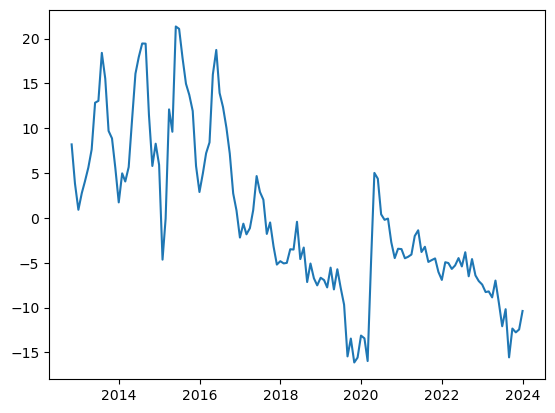

In [26]:
plt.plot(y - y_pred)

In [31]:
# y - y_pred
r,p = pearsonr(y,y_pred)
# The p-value is used to estimate the significance of the calculated correlation
print("Pearson correlation coefficient : ", r,"\n Significant at the 95% level : ",p < 0.05)

Pearson correlation coefficient :  0.8444078151960359 
 Significant at the 95% level :  True


### Sensitivity and trend estimation
The slope of the regression line is also called "regression coefficient" and can be understood as a sensitivity of y to a change in X 

In [33]:
# note that the derived coefficients of the two different solutions are not identical (but only because they are stored with different accuracy). 
# The function isclose() from the package math confirms that this.
print(slope)
print(regr.coef_)
print(slope==regr.coef_)

import math
print(math.isclose(slope,regr.coef_))

0.6564505361859377
[0.65645054]
[False]
True


/var/folders/t6/5_9wb5l977x88ky4d3sq3tnc0000gn/T/ipykernel_2245/3520222514.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(math.isclose(slope,regr.coef_))


Often, we need to calculate uncertainty estimates for the sensitivity estimate. We can do this, by calculating a range of values that contains the *true* sensitivity to a certain probability (typically 95%).

In [34]:
res = stats.linregress(X,y)

# here, we define a function that returns the confidence interval for the slope and the intercept 
def conf_int(X, model, p = 0.05):
    """
    This function calculates a confidence interval for a slope and intercept of a linear model.
    Only works when the model provided is a scipy.stats.linregress() model.
    Returns: confidence interval for a slope and intercept 
    """
    from scipy.stats import t
    ts = abs(t.ppf(p/2, len(X)-2))
    slope_ci = model.stderr*ts
    intercept_ci = model.intercept_stderr*ts
    return slope_ci, intercept_ci

# we can now call the function
slope_ci, intercept_ci = conf_int(X, res)
print(f"slope (95%): {res.slope:.6f} +/- {slope_ci:.2f}")
print(f"intercept (95%): {res.intercept:.6f}" f" +/- {intercept_ci:.2f}")

slope (95%): 0.656451 +/- 0.07
intercept (95%): 6.540899 +/- 4.55


To illustrate how data selection influences the estimated slope, let's split the data into two groups, and fit a model to each group

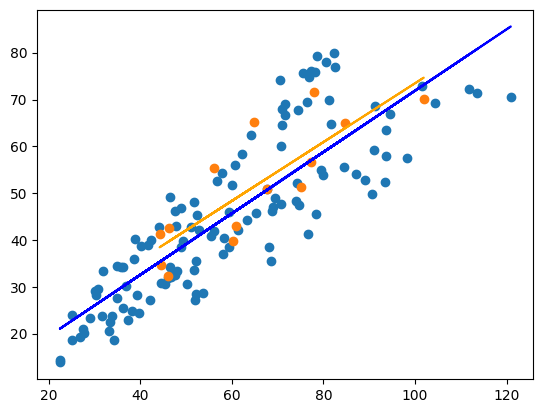

In [35]:
from sklearn.model_selection import train_test_split

# The function splits up the data (X and y) into train and test splits. The test_size determines the fraction of the data
# used for testing. 
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.1, random_state=1) # the random_state argument creates pseudo (reproducable) random data 
regr.fit(X_train,y_train) # train the model on the training data
y_pred_train = regr.predict(X_train) # predict with the model trained on training data
regr.fit(X_test,y_test) # train the model on the testing data
y_pred_test = regr.predict(X_test) #  predict with the model trained on test data

# note: normally we train with the training data and test the model with the test data. This is just an example!

plt.scatter(X_train,y_train, label='training data')
plt.scatter(X_test,y_test, label='test data')
plt.plot(X_train, y_pred_train, color='b', label='fitted line to training')
plt.plot(X_test, y_pred_test, color='orange', label='fitted line to test')
plt.show() 

As we can see, the regression model that is fit to only a small number of data points can deviate substantially from the line that is fit to all data points. Takeaway: In real world problems, we never have *all* data points available. As such, the confidence interval gives us an important estimate of the range of likely values based on the data at hand. (by the way: confidence intervals are not only useful/important for estimating a regression slope, but also for estimating e.g. the mean value of a data set). A good scientific analysis will always provide both: an estimation and an uncertainty calculation.

Let's create random data for the same function that is shown in the slides to dive a bit deeper. 

$y = 2 + 3*X + \epsilon$

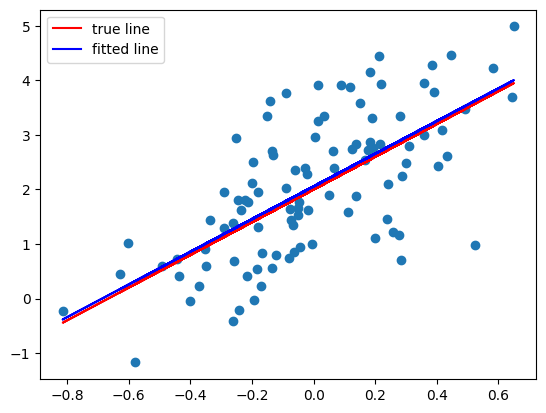

In [36]:
X = np.random.normal(0,0.1,100)*3
e = np.random.randn(100)
y = 2 + 3*X + e
slope, intercept, rvalue, pvalue, stderr = stats.linregress(X,y)

plt.scatter(X,y)
plt.plot(X, 2 + 3*X, 'r', label='true line')
plt.plot(X, intercept + slope*X, 'b', label='fitted line')
plt.legend()
plt.show()

Let's now do the same repeatedly for 1000 times (n_iter) and see what happens to the estimated sensitivities.   

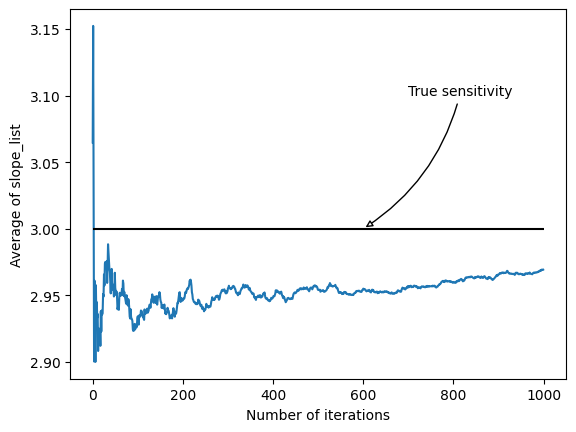

In [37]:
n_iter = 1000
slope_list = [] # we create empty lists into which we can add the results of each iteration  
intercept_list = []
mean_slopes = []
for i in range(n_iter):
    # create random data for each iteration
    X = np.random.normal(0,0.1,100)*3
    e = np.random.randn(100)
    y = 2 + 3*X + e
    # estimate regression for each iteration and add to lists
    slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
    slope_list.append(slope)
    intercept_list.append(intercept)
    # calculate the average of all slopes in the list at the time of this iteration 
    mean_slopes.append(np.mean(slope_list))

fig, ax = plt.subplots()
ax.plot(np.arange(n_iter),mean_slopes)   
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Average of slope_list')
ax.hlines(3,0,n_iter,color='k')
ax.annotate("True sensitivity", xy=(600, 3), xycoords='data', xytext=(700, 3.1), textcoords='data',
                  arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=-0.2", fc="w"),)
plt.show()
# see tasks below 

We can also approximate the confidence intervals manually, by using such iterative approach, and using the percentiles of the distribution of all resultant slopes/intercepts. However, this is only illustrative...

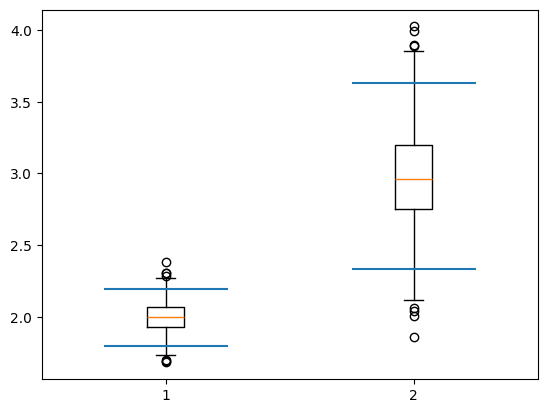

In [38]:
plt.boxplot([intercept_list,slope_list])
plt.hlines(np.percentile(intercept_list,2.5),0.75,1.25)
plt.hlines(np.percentile(intercept_list,97.5),0.75,1.25)
plt.hlines(np.percentile(slope_list,2.5),1.75,2.25)
plt.hlines(np.percentile(slope_list,97.5),1.75,2.25)
plt.show()

Let's take a look at the effects of outliers and high-leverage points for sensitivity estimates. 

In [39]:
# create copies of the data sets
y_outlier = y.copy()
X_outlier = X.copy()
y_leverage = y.copy()
X_leverage = X.copy()

# Change the first data point in the X and y data sets to create an outlier and a high-leverage point 
y_outlier[0] = -5
X_outlier[0] = 0
y_leverage[0] = -5
X_leverage[0] = 2

# -> see task 10 below

### Trend analysis

/Users/hendrikandersen/anaconda3/envs/ws_2024/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<Axes: xlabel='Time', ylabel='CO2 measurement at Mauna Loa [PPM]'>

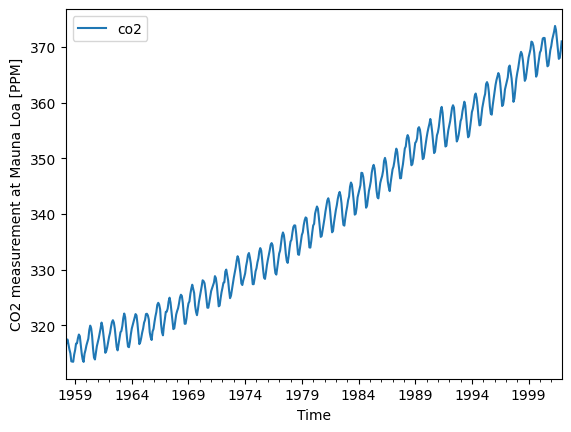

In [40]:
# we are again using the co2 time series of Mauna Loa for this example. 

data = fetch_openml(data_id=41187, as_frame=True)
df = data.frame # convert as pandas data frame
df.index = pd.to_datetime(df[['year','month', 'day']]) # use the columns with temporal information to create time stamps and use them as index
df = df.drop(['year','month','day','weight','flag','station'], axis=1) # drop the columns that are not needed
df_resampled = df.resample('m').mean() # resample the data set to monthly means
df_resampled['co2'] = df_resampled['co2'].interpolate() # interpolate the missing values

df_resampled.plot(xlabel='Time',ylabel='CO2 measurement at Mauna Loa [PPM]')

Text(0, 0.5, 'CO2 measurements at Mauna Loa [PPM]')

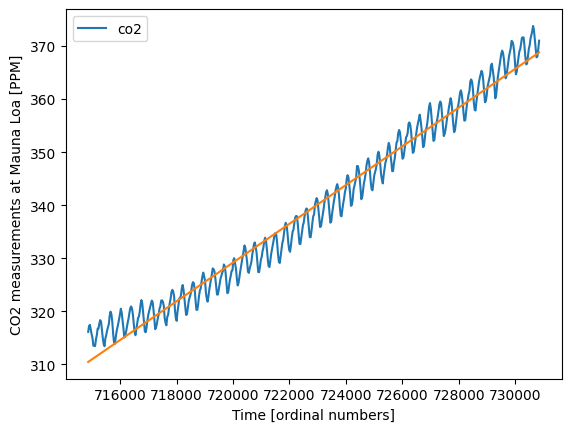

In [41]:
# for the linear regression to work, we need to convert the time stamps to ordinal numbers
df_resampled.index = df_resampled.index.map(pd.Timestamp.toordinal)

# we are using the sklearn function LinearRegression()
model = LinearRegression()
# we can then fit the model on the nex index of the data frame (the ordinal numbers of the dates, and the co2 measurements)
model.fit(np.expand_dims(df_resampled.index.values,axis=1), df_resampled.co2.values)
# make a prediction for each date (ordinal number)
y_predicted = model.predict(np.expand_dims(df_resampled.index.values,axis=1))

ax = df_resampled.plot()
ax.plot(df_resampled.index, y_predicted)
ax.set_xlabel('Time [ordinal numbers]')
ax.set_ylabel('CO2 measurements at Mauna Loa [PPM]')

__Tasks:__

9. Compute a confidence interval for the two groups of data split with train_test_split. What is the reason for the differences in the range of the confidence interval?
10. Calculate a regression analysis for the outlier and high-leverage data and create a plot. Which of the issues (outlier/leverage) is more critical for sensitivity estimation?
11. Why is the line of the average slope_list approaching the true sensitivity?
12. What is the trend of CO2 at Mauna Loa for the considered time period (in PPM/decade)?

### Multiple regression

For multiple regression, we use the LinearRegression() function from scipy. We first combine all predictor variables in an n x p shaped matrix 


In [42]:
# let's use X (eastward going cyclists), z (total cyclists), and a randomly generated dummy variable  
df = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
df = df.rename(columns={"Fremont Bridge Sidewalks, south of N 34th St": "total", 
                        "Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk": "east",
                        "Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk": "west"}) 

X = df['east'].resample('m').mean()
y = df['west'].resample('m').mean()
z = df['total'].resample('m').mean()

X_multi = np.array([X, z, np.random.randn(X.size)]).T
print(X_multi.shape)

/var/folders/t6/5_9wb5l977x88ky4d3sq3tnc0000gn/T/ipykernel_2245/719450197.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)


(135, 3)


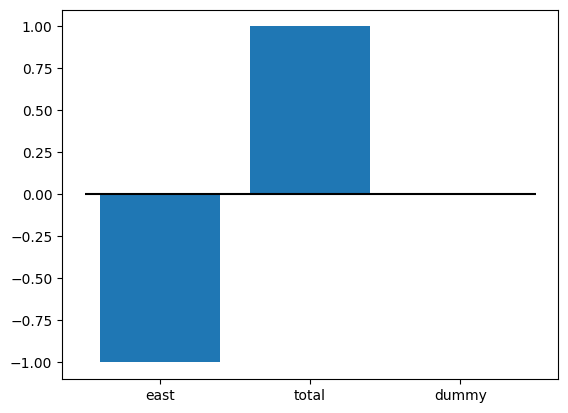

In [43]:
regr.fit(X_multi,y)
plt.bar(np.arange(3), height = regr.coef_)
plt.hlines(0,-0.5,2.5, color='k')
plt.xticks([0,1,2], labels = ['east','total','dummy'])
plt.show()

__Tasks:__
1. How do you interpret the negative and positive coefficients for 'east' and 'total' of the multiple regression? What could cause such strange behaviour when clearly both predictors should be positively related to the response?

### Data distributions, trends, stationarity
In linear regression, assumptions are made about the distribution of the date (normal distribution) to estimate p-values, coefficients and their uncertainties. Also, in environmental sciences stationarity (trends) and other temporal patterns (seasonal cycles) need to be accounted for. 

First, let us create a Pandas dataframe with randomly generated time series data.

In [44]:
from datetime import datetime, timedelta
from scipy.stats import pearsonr

n = 365
date_today = datetime.now()
days = pd.date_range(date_today, date_today + timedelta(n-1), freq='D')

np.random.seed(seed=1)
x = np.random.randn(n) # x and y are normally distributed random numbers
y = np.random.randn(n)
uniform = np.random.rand(n) # uniform distribution

x.size
df = pd.DataFrame({'time': days, 'x': x})
df['y'] = y
df['uniform'] = uniform
df = df.set_index('time')
df['lognorm'] = np.random.lognormal(size=n)
df.index = pd.to_datetime(df.index)
print(df)

                                   x         y   uniform   lognorm
time                                                              
2024-01-22 12:54:34.582935  1.624345  0.727813  0.708461  4.765199
2024-01-23 12:54:34.582935 -0.611756  0.515074  0.777469  2.833668
2024-01-24 12:54:34.582935 -0.528172 -2.782534  0.494843  0.207206
2024-01-25 12:54:34.582935 -1.072969  0.584647  0.528533  1.018779
2024-01-26 12:54:34.582935  0.865408  0.324274  0.150784  0.644815
...                              ...       ...       ...       ...
2025-01-16 12:54:34.582935 -0.557495  0.282996  0.126713  2.829575
2025-01-17 12:54:34.582935  0.939169  0.108031  0.244267  1.163059
2025-01-18 12:54:34.582935 -1.943323  0.029418  0.079342  1.157641
2025-01-19 12:54:34.582935  0.352494 -0.134793  0.302858  1.604006
2025-01-20 12:54:34.582935 -0.236437  1.049218  0.741705  0.468593

[365 rows x 4 columns]


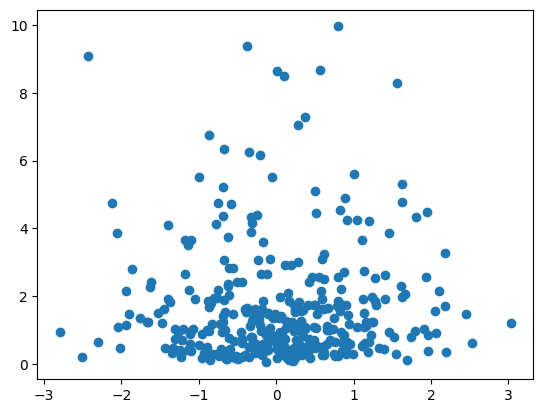

In [45]:
plt.scatter(df['x'],df['lognorm'])
plt.show()

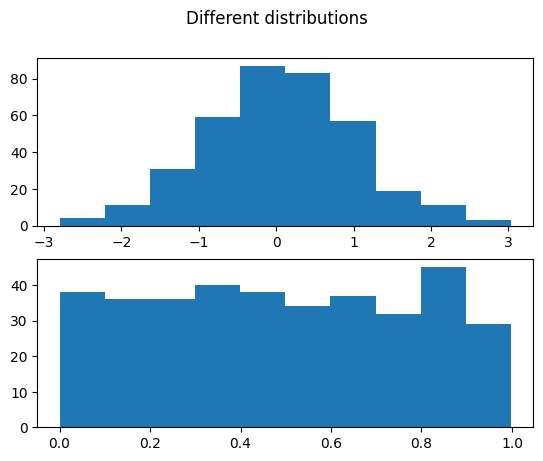

In [46]:
fig, axs = plt.subplots(2)
fig.suptitle('Different distributions')
axs[0].hist(df['x'])
axs[1].hist(df['uniform'])
plt.show()

The next figure shows some of the typical properties of normal distribution, which is not given in the uniform distribution. In a normal distribution, the mean = median (also the case for uniform), but also

1. 67% of the data is within 1 standard deviation of the mean
2. 95% of the data is within 2 standard deviations of the mean
2. 99.7% of the data is within 3 standard deviations of the mean

This is critical to estimate probabilities from data, a classic task for parameteric statistics (e.g. pearson correlation, linear regression). If normality is not given, the data should be transformed (see below), or a different statistical method be chosen (e.g. spearman correlation, which correlates the ranks of the data and not its values). The red vertical lines in the following show 1, 2, and 3 standard deviations from the mean, illustrating that the probability properties described above only hold for the normal distribution.

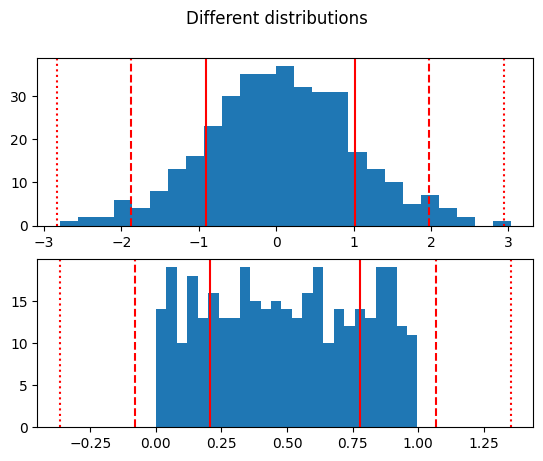

In [47]:
fig, axs = plt.subplots(2)
fig.suptitle('Different distributions')
axs[0].hist(x,bins=25)
axs[0].axvline(np.mean(df['x'])-np.std(df['x']),c='r')
axs[0].axvline(np.mean(df['x'])+np.std(df['x']),c='r')
axs[0].axvline(np.mean(df['x'])-2*np.std(df['x']),c='r',linestyle='--')
axs[0].axvline(np.mean(df['x'])+2*np.std(df['x']),c='r',linestyle='--')
axs[0].axvline(np.mean(df['x'])-3*np.std(df['x']),c='r',linestyle=':')
axs[0].axvline(np.mean(df['x'])+3*np.std(df['x']),c='r',linestyle=':')
axs[1].hist(uniform,bins=25)
axs[1].axvline(np.mean(df['uniform'])-np.std(df['uniform']),c='r')
axs[1].axvline(np.mean(df['uniform'])+np.std(df['uniform']),c='r')
axs[1].axvline(np.mean(df['uniform'])-2*np.std(df['uniform']),c='r',linestyle='--')
axs[1].axvline(np.mean(df['uniform'])+2*np.std(df['uniform']),c='r',linestyle='--')
axs[1].axvline(np.mean(df['uniform'])-3*np.std(df['uniform']),c='r',linestyle=':')
axs[1].axvline(np.mean(df['uniform'])+3*np.std(df['uniform']),c='r',linestyle=':')
plt.show()

Here, data is randomly generated from a log distribution (see upper figure), but then transformed to approximate a normal distribution (lower panel). This is a typical step of data preprocessing.

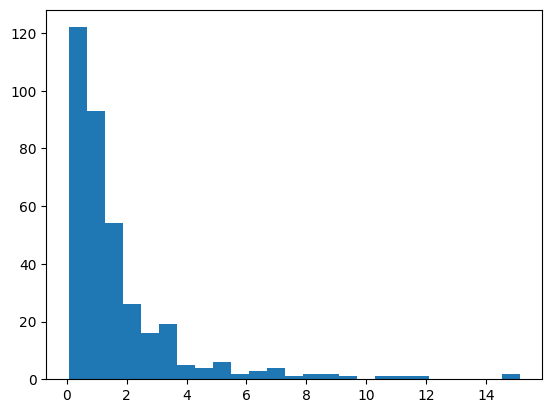

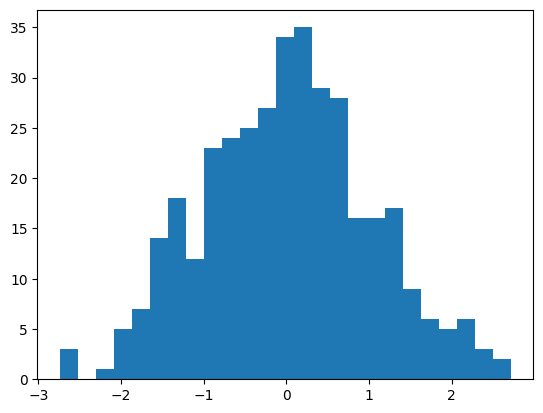

In [48]:
df['lognorm'] = np.random.lognormal(size=n)

plt.hist(df['lognorm'],bins=25)
plt.show()
# we can log-transform the data to give its distribution normality
plt.hist(np.log(df['lognorm']),bins=25)
plt.show()

The essence is: Before computing a correlation or regression, one should check for normality. There are a number of analyses/tests that can be done to achieve this.

1. Look at the histogram (should be bell-shaped)
2. Check if mean is close to median
3. Check how much of the data is within 1,2,3 standard deviations of the mean
4. Perform statistical test for normality

For the latter point, there are a variety of statistical tests that can be done, one of which is shown below. Please check the help to understand what the test does and how to interpret the outcome. Also, there are many online resources to find more information on this topic, e.g. https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In [49]:
# Test normality with Shapiro-Wilks Test
from scipy.stats import shapiro
print(shapiro(df['x'])) # Check out the help to find out what the test does
print(shapiro(df['lognorm']))
print(shapiro(np.log(df['lognorm'])))

ShapiroResult(statistic=0.9984887838363647, pvalue=0.9884511828422546)
ShapiroResult(statistic=0.6579661965370178, pvalue=1.9541841070433744e-26)
ShapiroResult(statistic=0.9966270923614502, pvalue=0.64415442943573)


In [50]:
from scipy.stats import shapiro
help(shapiro)

Help on function shapiro in module scipy.stats._morestats:

shapiro(x)
    Perform the Shapiro-Wilk test for normality.
    
    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    
    Returns
    -------
    statistic : float
        The test statistic.
    p-value : float
        The p-value for the hypothesis test.
    
    See Also
    --------
    anderson : The Anderson-Darling test for normality
    kstest : The Kolmogorov-Smirnov test for goodness of fit.
    
    Notes
    -----
    The algorithm used is described in [4]_ but censoring parameters as
    described are not implemented. For N > 5000 the W test statistic is
    accurate, but the p-value may not be.
    
    References
    ----------
    .. [1] https://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm
    .. [2] Shapiro, S. S. & Wilk, M.B (1965). An analysis of variance

### Trends in data
The following cells will visualize and help you understand how trends (seasonal and diurnal cycles can have similar effects) can change the statistical relationship, and hence the interpretation of the physical relationship between a predictor (x) and a predictand (y). We will work with the random time series data again.

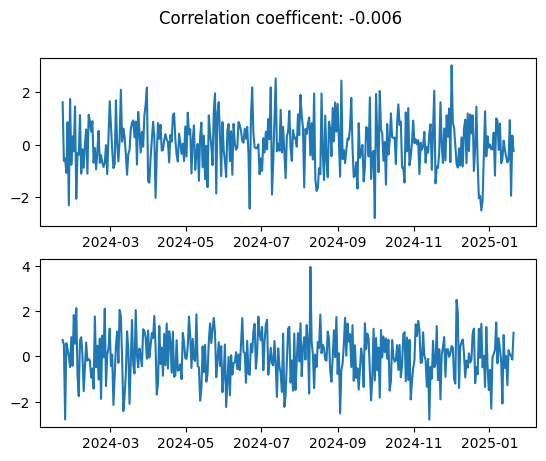

In [51]:
fig, axs = plt.subplots(2)
fig.suptitle('Correlation coefficent: ' + str(round(pearsonr(df['x'],df['y'])[0],3))) # the data is not correlated, it is just random!
axs[0].plot(df['x'])
axs[1].plot(df['y'])
plt.show()

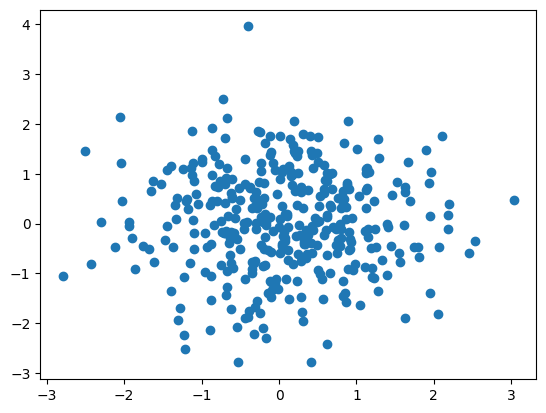

In [52]:
plt.scatter(df['x'],df['y']) # the scatter plot also shows that there is no relationship between x and y

Clearly, there is no relationship between the two randomly generated data sets. Now, we are adding artificial trends to the random data.

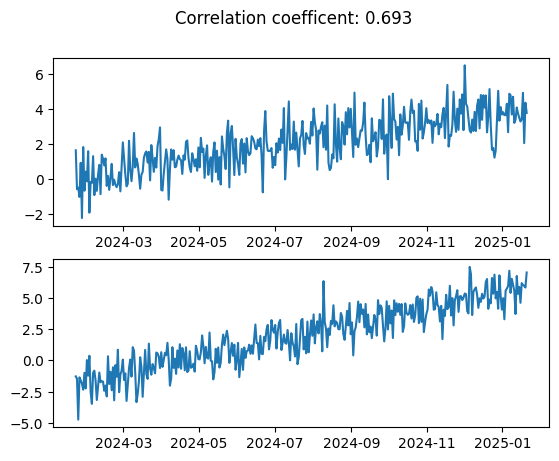

In [53]:
trend_1 = np.linspace(0,4,n)
trend_2 = np.linspace(-2,6,n)

df['x'] = df['x']+trend_1
df['y'] = df['y']+trend_2

fig, axs = plt.subplots(2)
fig.suptitle('Correlation coefficent: ' + str(round(pearsonr(df['x'],df['y'])[0],3)))
axs[0].plot(df['x'])
axs[1].plot(df['y'])
plt.show()

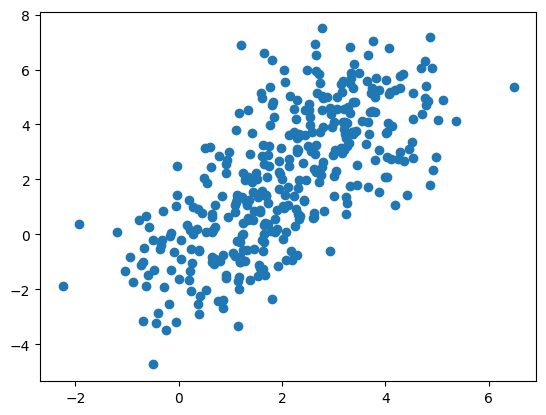

In [54]:
plt.scatter(df['x'],df['y']) 
plt.show()

From the visualizations above, it now seems clear that the data is strongly correlated and that x has a strong impact on y - but it is just random data + trend! To remove the effects of trends in sensitivity analyses, data needs to be detrended. The influence of x on y would be still visible in the residuals of the detrended data. Exemption to the rule: If the trend in X causes the trend in y.

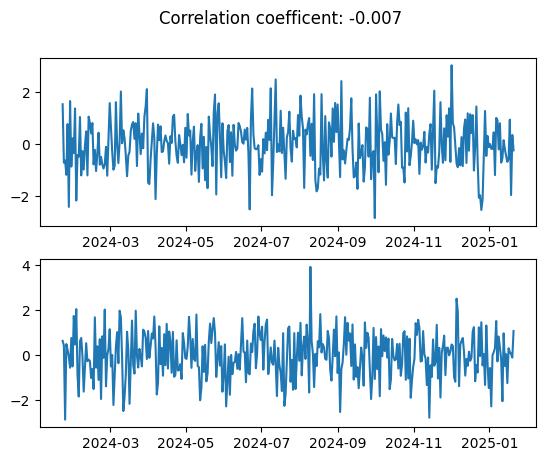

In [55]:
from scipy import signal

df['x'] = signal.detrend(df['x'])
df['y'] = signal.detrend(df['y'])

fig, axs = plt.subplots(2)
fig.suptitle('Correlation coefficent: ' + str(round(pearsonr(df['x'],df['y'])[0],3)))
axs[0].plot(df['x'])
axs[1].plot(df['y'])
plt.show()

As mentioned above, similar aspects are relevant for seasonal and diurnal cycles as well. In most cases, it is better to deseasonalize geoscientific data (e.g. by subtracting a running mean or the monthly mean) when estimating the effect of X on y.